In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, ConstantKernel, RBF
from sklearn.multioutput import MultiOutputRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time as time
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
!ls /media/disk/erc/papers/2019_ML_OCN/data

raph_temp_data_NA


In [4]:
data_path = '/media/disk/erc/papers/2019_ML_OCN/data/raph_temp_data_NA/'

# Import data
X = pd.read_csv(f"{data_path}X_INPUT_LOG_PCA_NA.csv")


X.describe()

,wmo,n_cycle,sla,PAR,RHO_WN_412,RHO_WN_443,RHO_WN_490,RHO_WN_555,RHO_WN_670,1,2,3,4,5,6,7,8,9,10
count,3.181000e+03,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3.181000e+03,3.181000e+03,3.181000e+03,3.181000e+03,3.181000e+03,3.181000e+03,3.181000e+03,3.181000e+03,3.181000e+03
mean,6.790443e+06,110.673688,-1.299802,42.429057,-1.817285,-1.864362,-1.914530,-2.221160,-3.063053,0.000000,4.717593e-15,2.029994e-14,1.508200e-14,2.306974e-14,5.736164e-15,-2.426701e-14,1.656518e-14,-7.112128e-15,-2.546428e-14
std,4.610381e+05,96.074956,6.367596,13.414969,0.250583,0.218535,0.175765,0.158956,0.228308,75.273124,1.649043e+01,9.496344e+00,5.964048e+00,3.453349e+00,3.331140e+00,2.827899e+00,2.004328e+00,1.406174e+00,1.329474e+00
min,3.902122e+06,1.000000,-47.530300,7.658160,-3.103068,-3.000000,-2.737900,-2.659280,-5.443568,-106.416803,-4.247265e+01,-2.240745e+01,-1.315154e+01,-1.076247e+01,-1.592344e+01,-1.017540e+01,-8.439650e+00,-7.188060e+00,-6.281040e+00
25%,6.901472e+06,34.000000,-5.063600,33.044000,-1.958607,-1.993085,-2.000000,-2.322931,-3.177302,-42.257307,-9.416668e+00,-4.582448e+00,-4.458510e+00,-1.988276e+00,-1.728534e+00,-1.456275e+00,-1.037335e+00,-7.316116e-01,-8.489055e-01
50%,6.901516e+06,78.000000,-1.374300,44.421900,-1.826773,-1.868150,-1.913993,-2.228608,-3.004121,-18.412567,-4.585460e+00,-1.930680e+00,-1.859815e+00,9.205945e-02,-3.006696e-01,1.885095e-01,8.494018e-02,6.395386e-02,-8.041814e-02
75%,6.901526e+06,170.000000,2.724100,53.844000,-1.661490,-1.734515,-1.814458,-2.132773,-2.942182,19.239909,1.106912e+01,4.226796e+00,2.172497e+00,1.752604e+00,1.491635e+00,1.496154e+00,1.139540e+00,7.388190e-01,8.090223e-01
max,6.903273e+06,379.000000,29.168600,63.337100,-1.200247,-1.283895,-1.271788,-1.440369,-2.276760,218.944064,4.854796e+01,4.337788e+01,2.713946e+01,2.007353e+01,2.145210e+01,1.049357e+01,1.378756e+01,8.047028e+00,6.355754e+00


In [ ]:
X = X.iloc[:, 2:]

In [5]:
y = pd.read_csv(f"{data_path}Y_OUTPUT_LOG_NA.csv")
y = y.iloc[:, 2:]

,sla,PAR,RHO_WN_412,RHO_WN_443,RHO_WN_490,RHO_WN_555,RHO_WN_670,1,2,3,4,5,6,7,8,9,10
count,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3.181000e+03,3.181000e+03,3.181000e+03,3.181000e+03,3.181000e+03,3.181000e+03,3.181000e+03,3.181000e+03,3.181000e+03
mean,-1.299802,42.429057,-1.817285,-1.864362,-1.914530,-2.221160,-3.063053,0.000000,4.717593e-15,2.029994e-14,1.508200e-14,2.306974e-14,5.736164e-15,-2.426701e-14,1.656518e-14,-7.112128e-15,-2.546428e-14
std,6.367596,13.414969,0.250583,0.218535,0.175765,0.158956,0.228308,75.273124,1.649043e+01,9.496344e+00,5.964048e+00,3.453349e+00,3.331140e+00,2.827899e+00,2.004328e+00,1.406174e+00,1.329474e+00
min,-47.530300,7.658160,-3.103068,-3.000000,-2.737900,-2.659280,-5.443568,-106.416803,-4.247265e+01,-2.240745e+01,-1.315154e+01,-1.076247e+01,-1.592344e+01,-1.017540e+01,-8.439650e+00,-7.188060e+00,-6.281040e+00
25%,-5.063600,33.044000,-1.958607,-1.993085,-2.000000,-2.322931,-3.177302,-42.257307,-9.416668e+00,-4.582448e+00,-4.458510e+00,-1.988276e+00,-1.728534e+00,-1.456275e+00,-1.037335e+00,-7.316116e-01,-8.489055e-01
50%,-1.374300,44.421900,-1.826773,-1.868150,-1.913993,-2.228608,-3.004121,-18.412567,-4.585460e+00,-1.930680e+00,-1.859815e+00,9.205945e-02,-3.006696e-01,1.885095e-01,8.494018e-02,6.395386e-02,-8.041814e-02
75%,2.724100,53.844000,-1.661490,-1.734515,-1.814458,-2.132773,-2.942182,19.239909,1.106912e+01,4.226796e+00,2.172497e+00,1.752604e+00,1.491635e+00,1.496154e+00,1.139540e+00,7.388190e-01,8.090223e-01
max,29.168600,63.337100,-1.200247,-1.283895,-1.271788,-1.440369,-2.276760,218.944064,4.854796e+01,4.337788e+01,2.713946e+01,2.007353e+01,2.145210e+01,1.049357e+01,1.378756e+01,8.047028e+00,6.355754e+00


In [6]:
y.describe()

,1,3,5,7,9,11,13,15,17,19,...,955,960,965,970,975,980,985,990,995,1000
count,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,...,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000
mean,-2.900663,-2.898407,-2.895640,-2.891294,-2.886683,-2.883220,-2.880841,-2.879046,-2.878439,-2.878442,...,-3.591383,-3.591066,-3.589926,-3.588963,-3.587449,-3.589363,-3.591955,-3.596240,-3.599698,-3.602358
std,0.358795,0.361310,0.363517,0.365821,0.366232,0.366527,0.366901,0.366984,0.366933,0.365515,...,0.183568,0.180024,0.180462,0.178927,0.179459,0.183057,0.183960,0.187008,0.189023,0.189302
min,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,...,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000
25%,-3.193820,-3.200659,-3.200659,-3.200659,-3.193820,-3.200659,-3.196231,-3.200659,-3.200659,-3.200659,...,-3.698970,-3.698970,-3.698970,-3.698970,-3.698970,-3.698970,-3.698970,-3.706795,-3.717453,-3.721246
50%,-2.870632,-2.869666,-2.864867,-2.856985,-2.855426,-2.847712,-2.844664,-2.838632,-2.834813,-2.835647,...,-3.602060,-3.602060,-3.602060,-3.602060,-3.602060,-3.602060,-3.602060,-3.619789,-3.619789,-3.619789
75%,-2.617983,-2.614394,-2.609065,-2.605548,-2.600326,-2.595166,-2.591760,-2.591760,-2.591760,-2.590913,...,-3.455932,-3.455932,-3.455932,-3.455932,-3.455932,-3.455932,-3.455932,-3.455932,-3.455932,-3.455932
max,-1.937794,-1.917933,-1.845044,-1.831797,-1.862329,-1.843754,-1.843754,-1.843754,-1.843754,-1.877456,...,-1.730487,-2.202145,-2.158015,-2.232432,-2.402766,-2.311306,-2.311306,-2.311306,-2.311306,-2.311306


In [91]:
# training and testing split
train_size = 0.8
random_state = 123

xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size, random_state=random_state)

### Scale Data

#### Method I - Manually

In [65]:
# Standardize Inputs (per dimension)
x_mean, x_std = xtrain.mean(axis=0), xtrain.std(axis=0)

xtrain_norm = (xtrain - x_mean) / x_std
xtest_norm = (xtest - x_mean) / x_std

# Normalize Outputs
y_mean = ytrain.mean(axis=0)

ytrain_norm = ytrain - y_mean
ytest_norm = ytest - y_mean

#### Method II - Scikit-Learn

In [92]:
# Normalize Inputs
x_normalizer = StandardScaler(with_mean=True, with_std=True)
xtrain_norm = x_normalizer.fit_transform(xtrain)
xtest_norm = x_normalizer.transform(xtest)

# Normalize Outputs
y_normalizer = StandardScaler(with_std=False)
ytrain_norm = y_normalizer.fit_transform(xtrain)
ytest_norm = y_normalizer.transform(xtest)

## Model I - Standard GPR

In [ ]:
# define kernel function
kernel = ConstantKernel() * RBF() + WhiteKernel()

# define GP model
gp_model = GaussianProcessRegressor(
    kernel=kernel,            # kernel function (very important)
    normalize_y=True,         # good standard practice
    random_state=123,         # reproducibility
    n_restarts_optimizer=10,  # good practice (avoids local minima)
)


# train GP Model
t0 = time.time()
gp_model.fit(xtrain, ytrain)
t1 = time.time() - t0


print(
    f"Training Time: {t1:.3} seconds"
)

In [ ]:
# Predictions
t0 = time.time()
ypred, ystd = gp_model.predict(xtest, return_std=True)
t1 = time.time() - t0


print(
    f"MAE: {mae:.3f}\nMSE: {mse:.3f}\nRMSE: {rmse:.3f}\nR2: {r2:.3f}" 
    f" \nTesting Time: {t1:.3} seconds"
)

## Model II - GPR w. PCA Transform

In [93]:
# define kernel function
kernel = ConstantKernel() * RBF(np.ones(xtrain.shape[1])) + WhiteKernel()

# define GP model
gp_model = GaussianProcessRegressor(
    kernel=kernel,            # kernel function (very important)
    normalize_y=True,         # good standard practice
    random_state=123,         # reproducibility
    n_restarts_optimizer=10,  # good practice (avoids local minima)
)

# Define target transformer
pca_model = PCA(n_components=10)

# Define Wrapper for target transformation
full_regressor = TransformedTargetRegressor(
    regressor=gp_model,
    transformer=pca_model,   # same number of components as informative
    check_inverse=False                 # PCA is not a direct inverse transformation

)

# train GP Model
t0 = time.time()
full_regressor.fit(xtrain_norm, ytrain_norm)
t1 = time.time() - t0

print(
    f"Training Time: {t1:.3f} seconds"
)

Training Time: 1152.199 seconds


In [94]:
# Predictions
t0 = time.time()
ypred = full_regressor.predict(xtest_norm)
t1 = time.time() - t0


# Get Average Stats
mae = mean_absolute_error(ytest_norm, ypred, multioutput='uniform_average')
mse = mean_squared_error(ytest_norm, ypred, multioutput='uniform_average')
rmse = np.sqrt(mse)
r2 = r2_score(ytest_norm, ypred, multioutput='uniform_average')
print(
    f"MAE: {mae:.3f}\nMSE: {mse:.3f}\nRMSE: {rmse:.3f}\nR2: {r2:.3f}" 
    f" \nTime: {t1:.3} seconds"
)

MAE: 1.613
MSE: 14.251
RMSE: 3.775
R2: 0.409 
Time: 0.0616 seconds


In [95]:
# Get Stats per Depth
mae_raw = mean_absolute_error(ytest_norm, ypred, multioutput='raw_values')
mse_raw = mean_squared_error(ytest_norm, ypred, multioutput='raw_values')
rmse_raw = np.sqrt(mse_raw)
r2_raw = r2_score(ytest_norm, ypred, multioutput='raw_values')

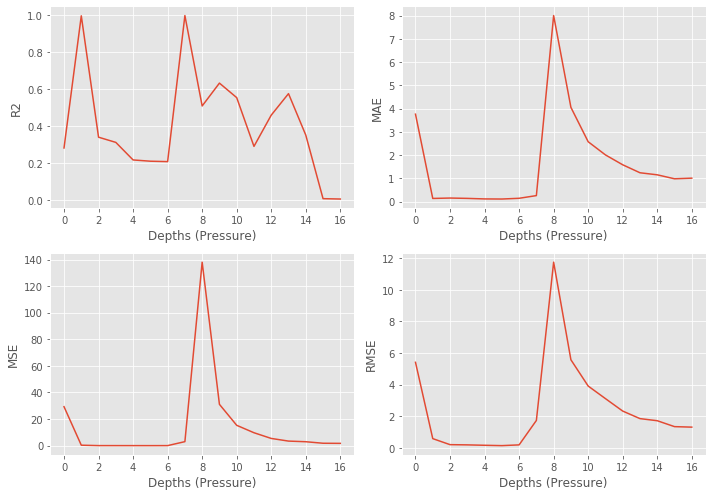

In [96]:
# Plots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

# R2 Values
ax[0,0].plot(r2_raw)
ax[0,0].set_xlabel('Depths (Pressure)')
ax[0,0].set_ylabel('R2')

# MAE
ax[0,1].plot(mae_raw)
ax[0,1].set_xlabel('Depths (Pressure)')
ax[0,1].set_ylabel('MAE')

# MSE
ax[1,0].plot(mse_raw)
ax[1,0].set_xlabel('Depths (Pressure)')
ax[1,0].set_ylabel('MSE')

# RMSE
ax[1,1].plot(rmse_raw)
ax[1,1].set_xlabel('Depths (Pressure)')
ax[1,1].set_ylabel('RMSE')


plt.tight_layout()
plt.show()

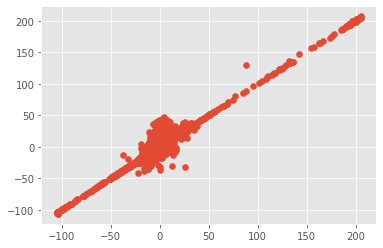

In [97]:
fig, ax = plt.subplots()

plt.scatter(ypred, ytest_norm)
plt.show()

## Model III - MultiTask GP w. PCA Transform

In [98]:
# define kernel function
kernel = ConstantKernel() * RBF(np.ones(xtrain.shape[1])) + WhiteKernel()

# define GP model
gp_model = GaussianProcessRegressor(
    kernel=kernel,            # kernel function (very important)
    normalize_y=True,         # good standard practice
    random_state=123,         # reproducibility
    n_restarts_optimizer=10,  # good practice (avoids local minima)
)

# Define Multioutput function
gp_model_multi = MultiOutputRegressor(
    gp_model, 
    n_jobs=-1,              # Number of cores to use to parallelize the training
)

# Define target transformer
pca_model = PCA(n_components=10)

# Define Wrapper for target transformation
full_regressor = TransformedTargetRegressor(
    regressor=gp_model_multi,
    transformer=pca_model,   # same number of components as informative
    check_inverse=False                 # PCA is not a direct inverse transformation

)


# Fit Model
t0 = time.time()
full_regressor.fit(xtrain_norm, ytrain_norm)
t1 = time.time() - t0


print(
    f"Training Time: {t1:.3f} seconds"
)

Training Time: 2225.352 seconds


In [99]:
# Predictions
t0 = time.time()
ypred = full_regressor.predict(xtest_norm)
t1 = time.time() - t0


# Get Average Stats
mae = mean_absolute_error(ytest_norm, ypred)
mse = mean_squared_error(ytest_norm, ypred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest_norm, ypred, multioutput='uniform_average')
print(
    f"MAE: {mae:.3f}\nMSE: {mse:.3f}\nRMSE: {rmse:.3f}\nR2: {r2:.3f}" 
    f" \nTime: {t1:.3} seconds"
)

MAE: 3.463
MSE: 321.103
RMSE: 17.919
R2: 0.555 
Time: 2.4 seconds


In [100]:
# Get Stats per Depth
mae_raw = mean_absolute_error(ytest_norm, ypred, multioutput='raw_values')
mse_raw = mean_squared_error(ytest_norm, ypred, multioutput='raw_values')
rmse_raw = np.sqrt(mse_raw)
r2_raw = r2_score(ytest_norm, ypred, multioutput='raw_values')

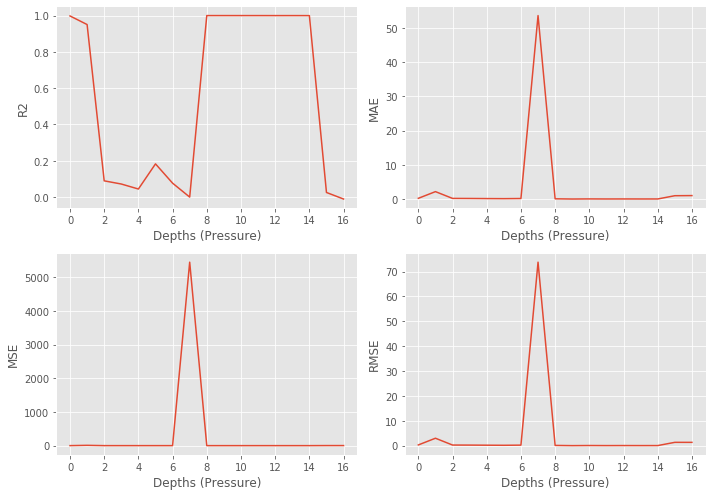

In [101]:
# Plots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

# R2 Values
ax[0,0].plot(r2_raw)
ax[0,0].set_xlabel('Depths (Pressure)')
ax[0,0].set_ylabel('R2')

# MAE
ax[0,1].plot(mae_raw)
ax[0,1].set_xlabel('Depths (Pressure)')
ax[0,1].set_ylabel('MAE')

# MSE
ax[1,0].plot(mse_raw)
ax[1,0].set_xlabel('Depths (Pressure)')
ax[1,0].set_ylabel('MSE')

# RMSE
ax[1,1].plot(rmse_raw)
ax[1,1].set_xlabel('Depths (Pressure)')
ax[1,1].set_ylabel('RMSE')


plt.tight_layout()
plt.show()

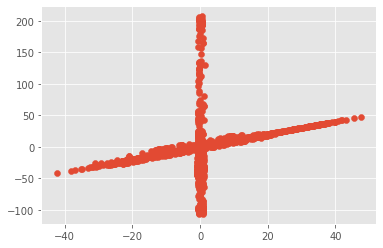

In [102]:
fig, ax = plt.subplots()

plt.scatter(ypred, ytest_norm)
plt.show()

In [14]:
# Predictions
t0 = time.time()
ypred = full_regressor.predict(xtest_norm)
t1 = time.time() - t0


# Get Stats
mae = mean_absolute_error(ytest_norm, ypred)
mse = mean_squared_error(ytest_norm, ypred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest_norm, ypred)

print(
    f"MAE: {mae:.3f}\nMSE: {mse:.3f}\nRMSE: {rmse:.3f}\nR2: {r2:.3f}" 
    f" \nTime: {t1:.3} seconds"
)

MAE: 5.000
MSE: 349.004
RMSE: 18.682
R2: 0.138 
Time: 1.44 seconds


In [26]:
ypred.shape, ytest.shape

((2181, 278), (2181, 278))

In [25]:
results_model = sm.OLS(ypred[:, 0], ytest[:, 0])
results = results_model.fit()
print(results.summary())

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [ ]:
mod = sm.OLS(spector_data.endog, spector_data.exog)

In [ ]:
#load data
INPUT =
pd.read_csv("/home/sauzede/Documents/R/DATA/MACHINE_LEARNING/DATASET_TO_TRY/X_INPUT_LOG_PCA_NA.csv")
INPUT.head()

X = INPUT
del X['wmo']
del X['n_cycle']
print("INPUTS")
print(X.head())

OUTPUT =
pd.read_csv("/home/sauzede/Documents/R/DATA/MACHINE_LEARNING/DATASET_TO_TRY/Y_OUTPUT_LOG_NA.csv")
OUTPUT.head()

y = OUTPUT
del y['wmo']
del y['n_cycle']
print("OUTPUTS")
print(y.head())

# Training and Testing
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=2500,
random_state=123)

print(xtrain.shape)
print(ytest.shape)

ytest = np.array(ytest)

MEAN_X_TRAIN = xtrain.apply(np.mean,0)
#print(MEAN_X_TRAIN)
SD_X_TRAIN = xtrain.apply(np.std,0)
#print(SD_X_TRAIN)

xtrain = np.array(xtrain)
xtest = np.array(xtest)

#center and reduce the input data
#nb of columns
n_col = xtrain.shape[1]

xtrain_cr = np.copy(xtrain)
xtest_cr= np.copy(xtest)
for i in np.arange(0,n_col,1):
     xtrain_cr[:,i] = (xtrain[:,i] - MEAN_X_TRAIN[i]) / SD_X_TRAIN[i]
     xtest_cr[:,i] = (xtest[:,i] - MEAN_X_TRAIN[i]) / SD_X_TRAIN[i]


#Center the outputs (per column)
n_coly = ytrain.shape[1]
MEAN_Y_TRAIN = ytrain.apply(np.mean,0)

ytrain = np.array(ytrain)
ytrain_c = np.copy(ytrain)
for i in np.arange(0,n_coly,1):
     ytrain_c[:,i] = ytrain[:,i] - MEAN_Y_TRAIN[i]